In [180]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [176]:
pip install h2o

     -------------------------------------- 265.2/265.2 MB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293984 sha256=fbd30cb0291a54e1ae55dfad885f06e059a63370f1a0f622d4e8c35af44b4472
  Stored in directory: c:\users\semen\appdata\local\pip\cache\wheels\1f\a0\9a\0990c3a2c357eb60cbba0677d681b40ddce4af46d69aca1a2d
Successfully built h2o
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Задание 1

### Подготовка данных

In [228]:
data = pd.read_csv("parkinsons.data")
data = data.drop('name', axis=1)
X = data.drop('status', axis=1)

y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### SVM

In [55]:
kernels = ['poly', 'rbf', 'sigmoid']
for kernel in kernels:
    model = svm.SVC(kernel=kernel, C=1)
    model.fit(X_train, y_train)
    y_predict_test = model.predict(X_test)
    y_predict_train = model.predict(X_train)
    print("Ядро: ", kernel)
    print("Ошибка для тестовой выборки: ", 1-accuracy_score(y_test, y_predict_test))

Ядро:  poly
Ошибка для тестовой выборки:  0.17948717948717952
Ядро:  rbf
Ошибка для тестовой выборки:  0.1923076923076923
Ядро:  sigmoid
Ошибка для тестовой выборки:  0.2564102564102564


In [60]:
acc_test_poly = []
acc_test_rbf = []
acc_test_sigmoid = []
c_values = [i for i in range(1, 750)]
for c in c_values:
    for kernel in kernels:
        model = svm.SVC(kernel=kernel, C=c)
        model.fit(X_train, y_train)
        y_predict_test = model.predict(X_test)
        y_predict_train = model.predict(X_train)
        if kernel == 'poly':
            acc_test_poly.append(1-accuracy_score(y_test, y_predict_test))
        if kernel == 'rbf':
            acc_test_rbf.append(1-accuracy_score(y_test, y_predict_test))
        if kernel == 'sigmoid':
            acc_test_sigmoid.append(1-accuracy_score(y_test, y_predict_test))

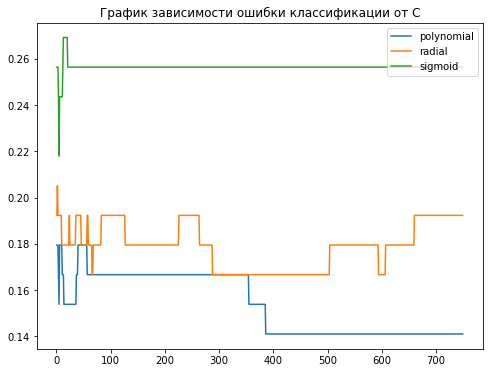

In [61]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(c_values, acc_test_poly, label="polynomial")
ax.plot(c_values, acc_test_rbf, label="radial")
ax.plot(c_values, acc_test_sigmoid, label="sigmoid")
ax.set_title("График зависимости ошибки классификации от C")
ax.legend(loc='upper right')

In [66]:
model = svm.SVC(kernel='poly', C=400, degree=2)
model.fit(X_train, y_train)
y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)
print("Ошибка для тестовой выборки: ", 1-accuracy_score(y_test, y_predict_test))

Ошибка для тестовой выборки:  0.14102564102564108


In [67]:
model = GaussianNB()
model.fit(X_train, y_train)
y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)
print("Ошибка классификации на тестовой выборке: ", 1-accuracy_score(y_test, y_predict_test))

Ошибка классификации на тестовой выборке:  0.2692307692307693


In [97]:
acc = []
test_coef = np.arange(0.1, 0.9, 0.05)
for value in test_coef:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=value, random_state=35)
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(1-accuracy_score(y_test, y_pred))
    acc.append(1-accuracy_score(y_test, y_pred))

0.19999999999999996
0.2666666666666667
0.30000000000000004
0.26530612244897955
0.3220338983050848
0.28985507246376807
0.30379746835443033
0.31818181818181823
0.2551020408163265
0.2407407407407407
0.27118644067796616
0.2992125984251969
0.33576642335766427
0.27210884353741494
0.23566878980891715
0.2650602409638554


Text(0, 0.5, 'Ошибка предсказания')

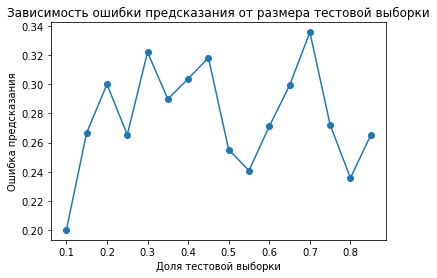

In [96]:
plt.plot(test_coef, acc, marker='o', linestyle='-')
plt.title('Зависимость ошибки предсказания от размера тестовой выборки')
plt.xlabel('Доля тестовой выборки')
plt.ylabel('Ошибка предсказания')

In [113]:
bagging_classifier = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=1000, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred = bagging_classifier.predict(X_test)
print(1-accuracy_score(y_test, y_pred))

0.17948717948717952


In [119]:
acc_test_KNN = []
acc_test_Tree = []
n_estimators = np.arange(10, 200, 10)
for n in n_estimators:
    bagging_classifier_knn = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=n, random_state=42)
    bagging_classifier_knn.fit(X_train, y_train)
    y_pred = bagging_classifier_knn.predict(X_test)
    acc_test_KNN.append(1-accuracy_score(y_test, y_pred))
    bagging_classifier_tree = BaggingClassifier(n_estimators=n, random_state=42)
    bagging_classifier_tree.fit(X_train, y_train)
    y_pred = bagging_classifier_tree.predict(X_test)
    acc_test_Tree.append(1-accuracy_score(y_test, y_pred))

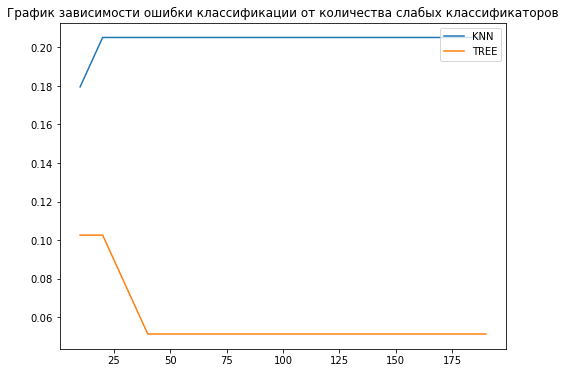

In [120]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(n_estimators, acc_test_KNN, label="KNN")
ax.plot(n_estimators, acc_test_Tree, label="TREE")
ax.set_title("График зависимости ошибки классификации от количества слабых классификаторов")
ax.legend(loc='upper right')

In [121]:
bagging_classifier_tree = BaggingClassifier(n_estimators=40, random_state=42)
bagging_classifier_tree.fit(X_train, y_train)
y_pred = bagging_classifier_tree.predict(X_test)
print(1-accuracy_score(y_test, y_pred))

0.05128205128205132


C:\Users\semen\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\semen\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


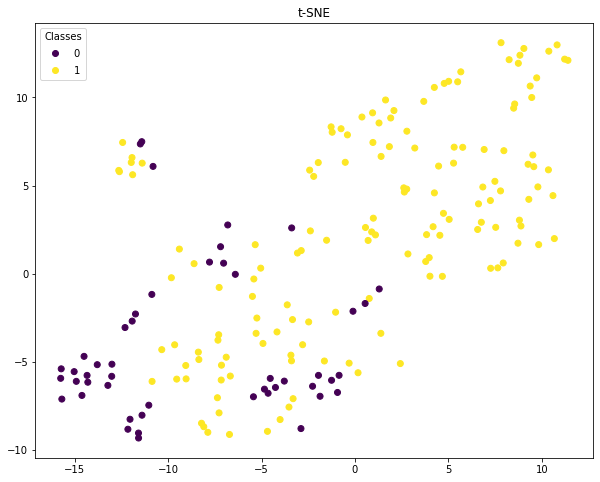

In [146]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_scaled)
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Target'] = y.values
plt.figure(figsize=(10,8))
scatter=plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=tsne_df['Target'], cmap='viridis')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.title('t-SNE')
plt.show()

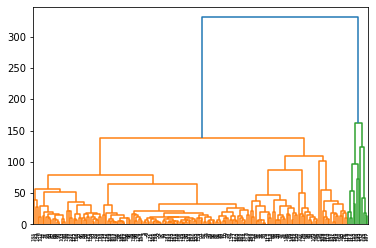

In [139]:
Z = hierarchy.linkage(X, 'average')
plt.figure()
dn = hierarchy.dendrogram(Z)

In [161]:
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(X)
for i in range(0, len(kmeans.labels_)):
    if kmeans.labels_[i] == 0:
        kmeans.labels_[i] = 1
    elif kmeans.labels_[i] == 1:
        kmeans.labels_[i] = 0

C:\Users\semen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\semen\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\semen\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


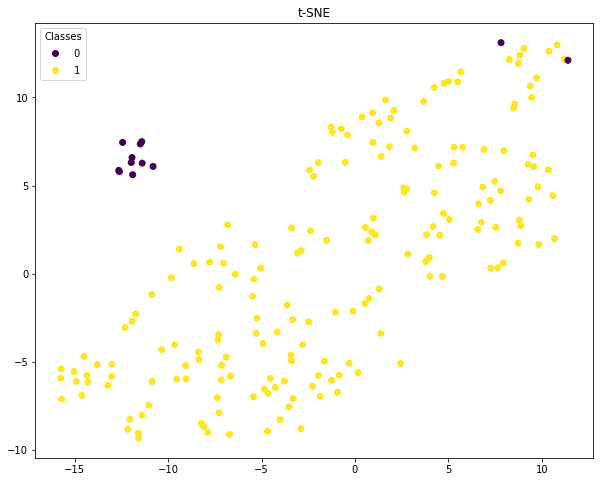

In [162]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_scaled)
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Target'] = kmeans.labels_
plt.figure(figsize=(10,8))
scatter=plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=tsne_df['Target'], cmap='viridis')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.title('t-SNE')
plt.show()

In [163]:

print(1-accuracy_score(y, kmeans.labels_))

0.27692307692307694


In [171]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
lasso_model.fit(X, y)

coefficients = lasso_model.coef_[0]
feature_names = X.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

print("Top Significant Features:")
print(coefficients_df[['Feature', 'Coefficient']])

Top Significant Features:
             Feature  Coefficient
20                D2     3.381114
9   MDVP:Shimmer(dB)     2.583487
18           spread1     1.397157
15               HNR     0.162981
0        MDVP:Fo(Hz)    -0.009267
1       MDVP:Fhi(Hz)    -0.003444
2       MDVP:Flo(Hz)    -0.002575
13       Shimmer:DDA     0.000000
19           spread2     0.000000
17               DFA     0.000000
16              RPDE     0.000000
14               NHR     0.000000
11      Shimmer:APQ5     0.000000
12          MDVP:APQ     0.000000
10      Shimmer:APQ3     0.000000
8       MDVP:Shimmer     0.000000
7         Jitter:DDP     0.000000
6           MDVP:PPQ     0.000000
5           MDVP:RAP     0.000000
4   MDVP:Jitter(Abs)     0.000000
3     MDVP:Jitter(%)     0.000000
21               PPE     0.000000


In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
input_layer = Input(shape=(22,))
encoded = Dense(7, activation='relu')(input_layer)
decoded = Dense(22,activation='linear')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=70, batch_size=8, shuffle=True, validation_data=(X_test, X_test))
encoder = Model(input_layer, encoded)
encoded_data_7 = encoder.predict(X)

Epoch 1/70
20/20 [==============================] - 1s 12ms/step - loss: 3835.9175 - val_loss: 4380.8115
Epoch 2/70
20/20 [==============================] - 0s 7ms/step - loss: 3763.5825 - val_loss: 4290.3271
Epoch 3/70
20/20 [==============================] - 0s 7ms/step - loss: 3648.9114 - val_loss: 4121.7759
Epoch 4/70
20/20 [==============================] - 0s 5ms/step - loss: 3415.7568 - val_loss: 3843.0825
Epoch 5/70
20/20 [==============================] - 0s 5ms/step - loss: 3105.2488 - val_loss: 3494.7544
Epoch 6/70
20/20 [==============================] - 0s 4ms/step - loss: 2749.3550 - val_loss: 3097.8896
Epoch 7/70
20/20 [==============================] - 0s 5ms/step - loss: 2352.2209 - val_loss: 2683.8743
Epoch 8/70
20/20 [==============================] - 0s 5ms/step - loss: 1924.7424 - val_loss: 2235.4312
Epoch 9/70
20/20 [==============================] - 0s 5ms/step - loss: 1529.2745 - val_loss: 1862.7212
Epoch 10/70
20/20 [==============================] - 0s 4ms/ste

In [267]:
X_train, X_test, y_train, y_test = train_test_split(encoded_data_7, y, test_size=0.05, random_state=42)
bagging_classifier_tree = BaggingClassifier(n_estimators=40, random_state=42)
bagging_classifier_tree.fit(X_train, y_train)
y_pred = bagging_classifier_tree.predict(X_test)
print(1-accuracy_score(y_test, y_pred))

0.19999999999999996


In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
input_layer = Input(shape=(22,))
encoded = Dense(22, activation='relu', activity_regularizer=tf.keras.regularizers.l1(1e-4))(input_layer)
decoded = Dense(22,activation='linear')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=70, batch_size=8, shuffle=True, validation_data=(X_test, X_test))
encoder = Model(input_layer, encoded)
encoded_data_l1 = encoder.predict(X)

Epoch 1/70
20/20 [==============================] - 1s 12ms/step - loss: 4123.5166 - val_loss: 4257.1060
Epoch 2/70
20/20 [==============================] - 0s 8ms/step - loss: 3369.8701 - val_loss: 3544.7539
Epoch 3/70
20/20 [==============================] - 0s 9ms/step - loss: 2707.0210 - val_loss: 2839.6638
Epoch 4/70
20/20 [==============================] - 0s 8ms/step - loss: 2048.3054 - val_loss: 2097.5112
Epoch 5/70
20/20 [==============================] - 0s 8ms/step - loss: 1397.6987 - val_loss: 1428.4929
Epoch 6/70
20/20 [==============================] - 0s 7ms/step - loss: 864.3378 - val_loss: 941.7010
Epoch 7/70
20/20 [==============================] - 0s 5ms/step - loss: 521.8400 - val_loss: 650.5662
Epoch 8/70
20/20 [==============================] - 0s 5ms/step - loss: 351.3407 - val_loss: 523.3647
Epoch 9/70
20/20 [==============================] - 0s 5ms/step - loss: 289.9017 - val_loss: 466.7315
Epoch 10/70
20/20 [==============================] - 0s 5ms/step - loss

In [271]:
X_train, X_test, y_train, y_test = train_test_split(encoded_data_l1, y, test_size=0.1, random_state=42)
bagging_classifier_tree = BaggingClassifier(n_estimators=10, random_state=42)
bagging_classifier_tree.fit(X_train, y_train)
y_pred = bagging_classifier_tree.predict(X_test)
print(1-accuracy_score(y_test, y_pred))

0.19999999999999996


C:\Users\semen\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\semen\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


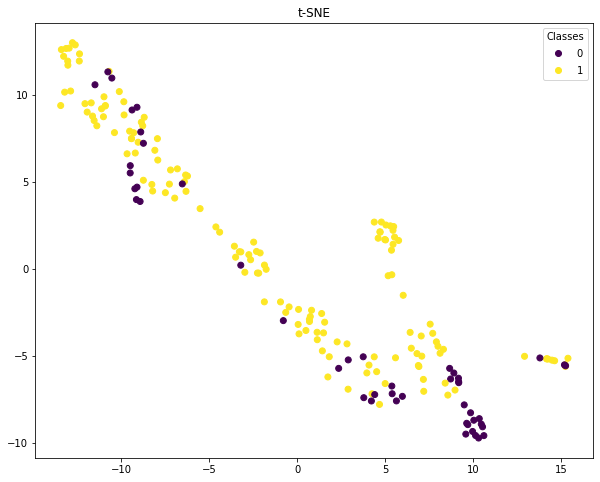

In [242]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(encoded_data)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_scaled)
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Target'] = y.values
plt.figure(figsize=(10,8))
scatter=plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=tsne_df['Target'], cmap='viridis')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.title('t-SNE')
plt.show()

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_noisy = X_train + 0.2*np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy =  X_test + 0.2*np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
input_layer = Input(shape=(22,))
encoded = Dense(7, activation='relu')(input_layer)
decoded = Dense(22,activation='linear')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train_noisy, X_train, epochs=70, batch_size=8, shuffle=True, validation_data=(X_test_noisy, X_test))
encoder = Model(input_layer, encoded)

Epoch 1/70
20/20 [==============================] - 1s 12ms/step - loss: 3938.6902 - val_loss: 4373.0298
Epoch 2/70
20/20 [==============================] - 0s 7ms/step - loss: 3680.0757 - val_loss: 4123.6450
Epoch 3/70
20/20 [==============================] - 0s 6ms/step - loss: 3495.0376 - val_loss: 3942.2786
Epoch 4/70
20/20 [==============================] - 0s 6ms/step - loss: 3331.8542 - val_loss: 3748.9883
Epoch 5/70
20/20 [==============================] - 0s 6ms/step - loss: 3143.5325 - val_loss: 3518.4607
Epoch 6/70
20/20 [==============================] - 0s 10ms/step - loss: 2916.5095 - val_loss: 3250.5801
Epoch 7/70
20/20 [==============================] - 0s 6ms/step - loss: 2650.0999 - val_loss: 2936.6738
Epoch 8/70
20/20 [==============================] - 0s 4ms/step - loss: 2348.6069 - val_loss: 2602.4917
Epoch 9/70
20/20 [==============================] - 0s 4ms/step - loss: 2038.9084 - val_loss: 2250.3782
Epoch 10/70
20/20 [==============================] - 0s 4ms/st

TypeError: 'DataFrame' object cannot be interpreted as an integer

In [256]:
X_new=X_test_noisy.append(X_train_noisy, ignore_index=True)
X_new

C:\Users\semen\AppData\Local\Temp\ipykernel_4072\3551047051.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_new=X_test_noisy.append(X_train_noisy, ignore_index=True)


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,112.262283,126.598722,103.936840,-0.074495,0.018974,-0.054268,0.203239,-0.143361,-0.147421,0.719295,...,0.208327,0.095346,-0.161405,17.408000,1.008285,0.552706,-5.526521,0.237452,2.472702,0.035890
1,143.988313,349.193611,83.077856,-0.018226,0.392391,0.185140,0.074007,0.026087,-0.022763,-0.025104,...,-0.075184,0.098160,0.068927,22.126907,0.552818,0.565437,-5.348956,0.560376,2.382584,0.282321
2,117.769300,127.393686,95.668759,-0.341890,-0.095049,0.385722,-0.451599,-0.100612,0.185231,0.094393,...,0.169792,-0.045470,-0.029941,22.493367,0.731887,0.959537,-3.383459,0.435112,2.586389,0.072149
3,159.004635,168.616121,144.939580,-0.054047,-0.178852,-0.198678,0.034162,0.268154,0.114397,0.135244,...,-0.100491,-0.134849,0.263826,22.888148,0.606980,0.782926,-6.635458,0.573024,2.547382,0.391534
4,144.128670,162.304704,65.945010,0.002246,0.154706,-0.305710,-0.300560,0.170260,-0.353954,0.388162,...,-0.134319,0.487079,-0.000557,20.592440,0.566349,0.396873,-5.973211,0.292886,2.011018,0.439233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,154.695118,163.836202,144.317534,-0.109024,-0.038682,0.010843,-0.144151,0.335863,-0.045397,0.273137,...,0.128610,-0.070286,0.113286,29.996105,0.014150,0.713560,-6.970906,0.003409,2.311578,0.216730
191,152.723918,163.126513,75.843018,0.056280,0.278699,0.183744,0.298514,-0.289195,0.008497,0.319628,...,-0.181240,-0.110078,-0.337435,24.670801,0.820570,0.676237,-5.756316,0.084417,2.143104,0.383774
192,148.286485,164.991384,142.146096,0.055678,-0.207362,-0.053430,0.404928,0.261306,-0.009497,0.442252,...,-0.047571,0.013011,-0.299353,18.671597,0.419462,0.706227,-5.967447,0.329894,2.424759,0.236943
193,148.335774,156.105491,134.910791,0.321285,-0.308788,0.093221,-0.006376,-0.074824,0.027765,-0.002931,...,-0.032347,-0.273968,0.333694,23.627383,0.412420,0.382938,-5.586264,0.223394,2.909706,0.434151


C:\Users\semen\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\semen\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


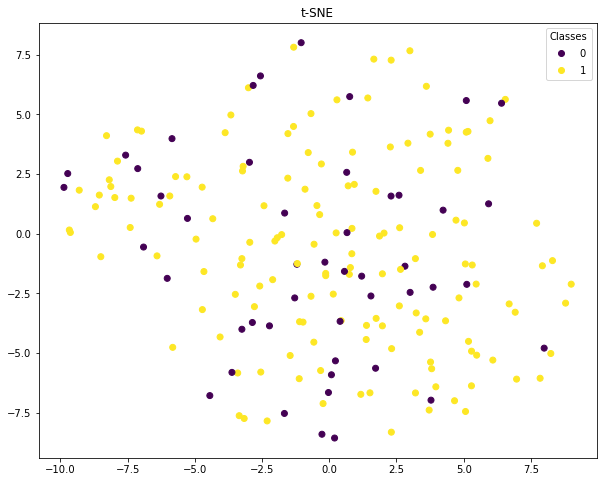

In [258]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_new)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_scaled)
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Target'] = y.values
plt.figure(figsize=(10,8))
scatter=plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=tsne_df['Target'], cmap='viridis')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.title('t-SNE')
plt.show()

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1, random_state=42)
bagging_classifier_tree = BaggingClassifier(n_estimators=40, random_state=42)
bagging_classifier_tree.fit(X_train, y_train)
y_pred = bagging_classifier_tree.predict(X_test)
print(1-accuracy_score(y_test, y_pred))

0.25
